In [127]:
import pyro
from pyro.distributions import Uniform, Normal
from pyro.infer import Importance, Marginal, SVI
from pyro.optim import Adam
from pyro.util import ng_ones, ng_zeros

import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style('oceans16')
%matplotlib inline

In [120]:
real_data = Variable(3*torch.ones(1)+0.1*torch.randn([100]))

In [145]:
def model(real_data):
    prior = Uniform(ng_zeros(1), ng_ones(1))
    mu = pyro.sample("mu", pyro.distributions.Uniform(ng_zeros(1), 5*ng_ones(1)))
    Obs_dist = Normal(mu, ng_ones(1))
    
    for i, m in enumerate(real_data):
        pyro.observe("obs_{}".format(i), Obs_dist, m)
    return mu

In [146]:
num_samples=500
posterior = Importance(model, guide=None, num_samples=num_samples)

In [147]:
marginal = Marginal(posterior)

In [148]:
post_samples = [marginal(real_data) for i in range(num_samples)]

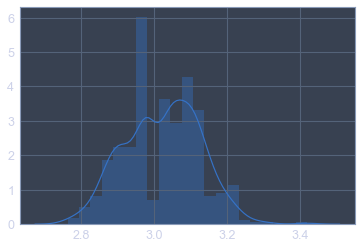

In [149]:
sns.distplot(torch.cat(post_samples).data.numpy())

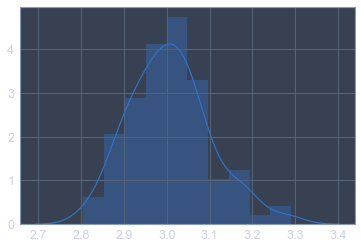

In [140]:
sns.distplot(real_data.data.numpy())